In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 654ms/step - accuracy: 0.6109 - loss: 2.3299 - val_accuracy: 0.9800 - val_loss: 0.1388 - learning_rate: 0.0010
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 463ms/step - accuracy: 0.9762 - loss: 0.0992 - val_accuracy: 0.9700 - val_loss: 0.0980 - learning_rate: 0.0010
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 451ms/step - accuracy: 0.9992 - loss: 0.0070 - val_accuracy: 0.9050 - val_loss: 0.3005 - learning_rate: 0.0010
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 442ms/step - accuracy: 0.9967 - loss: 0.0117 - val_accuracy: 0.9800 - val_loss: 0.0502 - learning_rate: 0.0010
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 442ms/step - accuracy: 0.9971 - loss: 0.0129 - val_accuracy: 0.9750 - val_loss: 0.0627 - learning_rate: 0.0010
Training and validation accuracy over epochs:
Epoch 1:
Training Accuracy: 75.38%
Validation Accuracy: 98.00%
Epoch 2:
Training Accuracy: 98.75%
Validation Acc

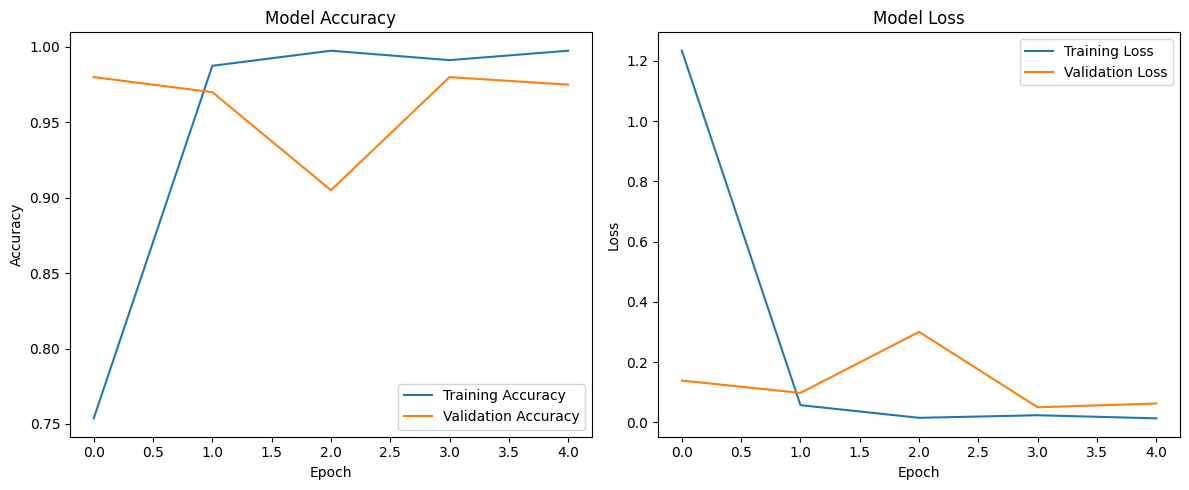

Finished Training


In [25]:
#1.cnn module
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define the custom CNN model
def create_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(64, (11, 11), strides=4, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    model.add(layers.Conv2D(192, (5, 5), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset2',
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset2',
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Initialize the model
input_shape = (227, 227, 3)
num_classes = len(train_generator.class_indices)
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up callbacks
checkpoint = ModelCheckpoint('best_custom_cnn_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[checkpoint, reduce_lr]
)

# Print training and validation accuracy
print("Training and validation accuracy over epochs:")
for epoch in range(len(history.history['accuracy'])):
    print(f"Epoch {epoch + 1}:")
    print(f"Training Accuracy: {history.history['accuracy'][epoch] * 100:.2f}%")
    print(f"Validation Accuracy: {history.history['val_accuracy'][epoch] * 100:.2f}%")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

print('Finished Training')


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 653ms/step - accuracy: 0.5809 - loss: 1.9003 - val_accuracy: 0.9750 - val_loss: 0.0892 - learning_rate: 0.0010
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 446ms/step - accuracy: 0.9997 - loss: 0.0199 - val_accuracy: 0.7950 - val_loss: 2.6355 - learning_rate: 0.0010
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 452ms/step - accuracy: 0.9893 - loss: 0.0607 - val_accuracy: 0.9500 - val_loss: 0.2144 - learning_rate: 0.0010
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 601ms/step - accuracy: 0.9991 - loss: 0.0039 - val_accuracy: 0.9950 - val_loss: 0.0195 - learning_rate: 0.0010
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 450ms/step - accuracy: 0.9956 - loss: 0.0181 - val_accuracy: 0.9950 - val_loss: 0.0361 - learning_rate: 0.0010
Training and validation accuracy over epochs:
Epoch 1:
Training Accuracy: 69.38%
Validation Accuracy: 97.50%
Epoch 2:
Training Accuracy: 99.87%
Validation Acc

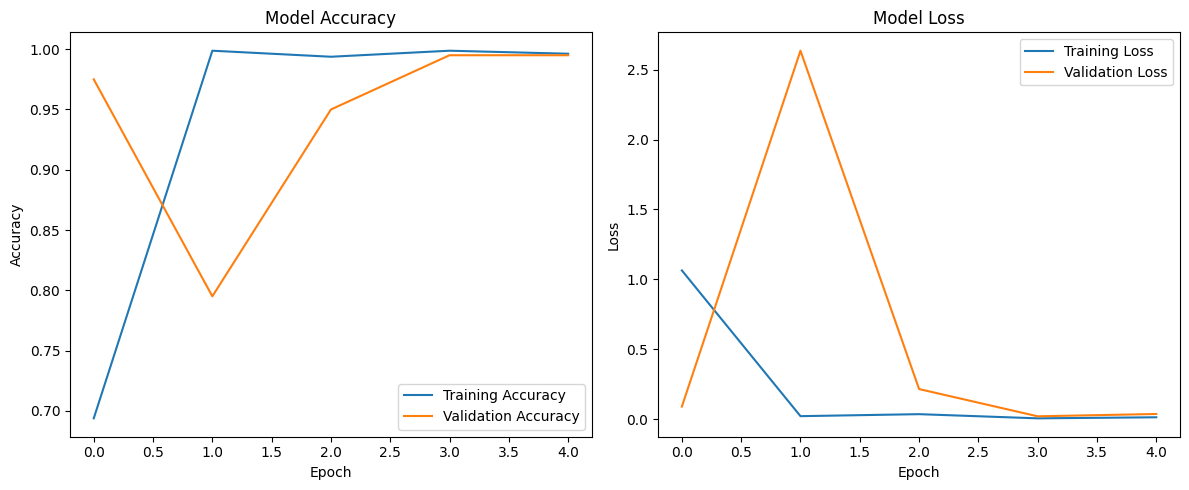

Finished Training


In [26]:
#2.alexnet
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load AlexNet from TensorFlow Hub or define a similar architecture
def create_alexnet(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(96, (11, 11), strides=4, padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset2',
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset2',
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Initialize the AlexNet model
input_shape = (227, 227, 3)
num_classes = len(train_generator.class_indices)
model = create_alexnet(input_shape, num_classes)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up callbacks
checkpoint = ModelCheckpoint('best_alexnet_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[checkpoint, reduce_lr]
)

# Print training and validation accuracy
print("Training and validation accuracy over epochs:")
for epoch in range(len(history.history['accuracy'])):
    print(f"Epoch {epoch + 1}:")
    print(f"Training Accuracy: {history.history['accuracy'][epoch] * 100:.2f}%")
    print(f"Validation Accuracy: {history.history['val_accuracy'][epoch] * 100:.2f}%")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

print('Finished Training')


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 898ms/step - accuracy: 0.6901 - loss: 14.4625 - val_accuracy: 0.9800 - val_loss: 0.2737 - learning_rate: 0.0010
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 462ms/step - accuracy: 0.9921 - loss: 0.0358 - val_accuracy: 0.9750 - val_loss: 0.3297 - learning_rate: 0.0010
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 465ms/step - accuracy: 0.9891 - loss: 0.0561 - val_accuracy: 0.9800 - val_loss: 0.0846 - learning_rate: 0.0010
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 468ms/step - accuracy: 0.9893 - loss: 0.0461 - val_accuracy: 0.9800 - val_loss: 0.1768 - learning_rate: 0.0010
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 463ms/step - accuracy: 0.9982 - loss: 0.0130 - val_accuracy: 0.9350 - val_loss: 0.1640 - learning_rate: 0.0010
Training and validation accuracy over epochs:
Epoch 1:
Training Accuracy: 84.50%
Validation Accuracy: 98.00%
Epoch 2:
Training Accuracy: 99.00%
Validation Ac

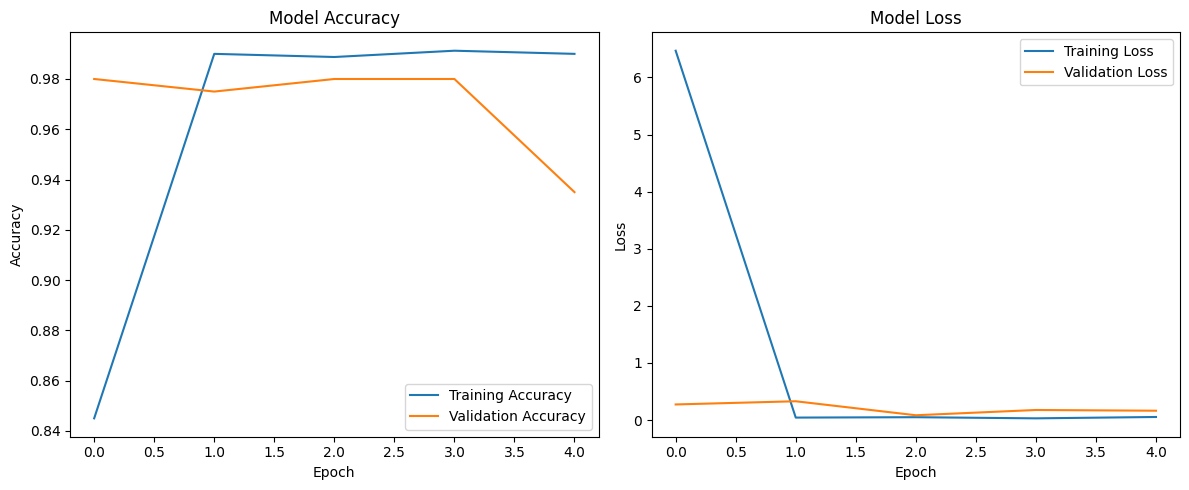

Finished Training


In [27]:
#3.vgg16
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load the VGG16 model with pre-trained weights, excluding the top fully-connected layers
def create_vgg16_model(input_shape, num_classes):
    base_model = tf.keras.applications.VGG16(
        include_top=False,  # Exclude the top fully-connected layers
        weights='imagenet',  # Load pre-trained weights from ImageNet
        input_shape=input_shape
    )

    # Freeze the base model layers
    base_model.trainable = False

    # Add custom top layers
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset2',
    target_size=(224, 224),  # VGG16 expects 224x224 input images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset2',
    target_size=(224, 224),  # VGG16 expects 224x224 input images
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Initialize the VGG16 model
input_shape = (224, 224, 3)  # VGG16 input size
num_classes = len(train_generator.class_indices)
model = create_vgg16_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up callbacks
checkpoint = ModelCheckpoint('best_vgg16_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[checkpoint, reduce_lr]
)

# Print training and validation accuracy
print("Training and validation accuracy over epochs:")
for epoch in range(len(history.history['accuracy'])):
    print(f"Epoch {epoch + 1}:")
    print(f"Training Accuracy: {history.history['accuracy'][epoch] * 100:.2f}%")
    print(f"Validation Accuracy: {history.history['val_accuracy'][epoch] * 100:.2f}%")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

print('Finished Training')


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 653ms/step - accuracy: 0.8978 - loss: 0.2636 - val_accuracy: 0.9650 - val_loss: 0.1385 - learning_rate: 0.0010
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 430ms/step - accuracy: 0.9964 - loss: 0.0444 - val_accuracy: 0.9650 - val_loss: 0.1478 - learning_rate: 0.0010
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 448ms/step - accuracy: 0.9992 - loss: 0.0033 - val_accuracy: 0.9950 - val_loss: 0.0337 - learning_rate: 0.0010
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 429ms/step - accuracy: 0.9966 - loss: 0.0230 - val_accuracy: 0.9850 - val_loss: 0.0580 - learning_rate: 0.0010
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 430ms/step - accuracy: 0.9987 - loss: 0.0019 - val_accuracy: 0.9950 - val_loss: 0.0274 - learning_rate: 0.0010
Training and validation accuracy over epochs:
Epoch 1:
Training Accuracy: 96.00%
Validation Accuracy: 96.50%
Epoch 2:
Training Accuracy: 99.62%
Validation Acc

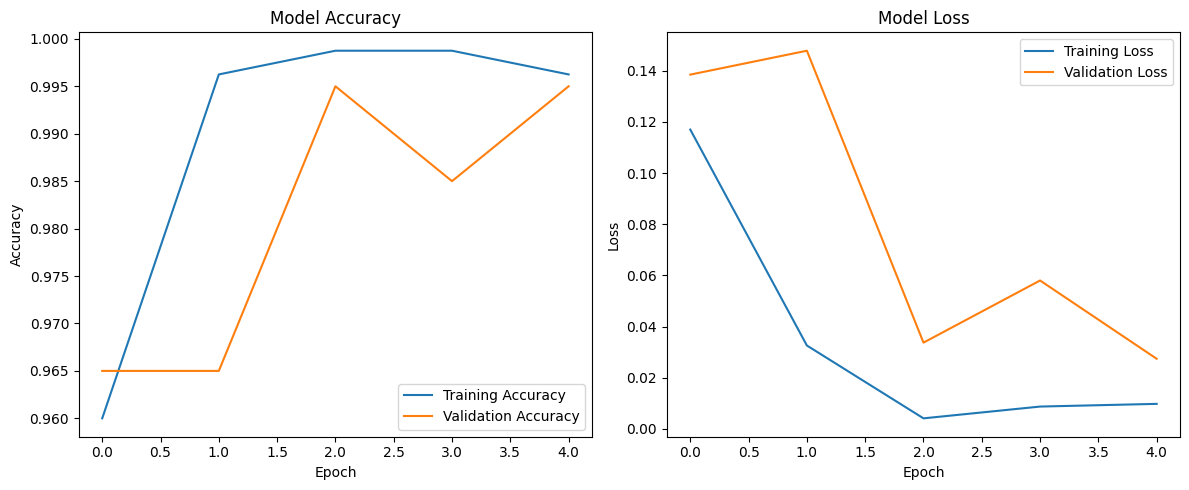

Finished Training


In [28]:
#4.mobilenetv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define the MobileNetV2 model with pre-trained weights
def create_mobilenetv2_model(input_shape, num_classes):
    base_model = tf.keras.applications.MobileNetV2(
        include_top=False,  # Exclude the top fully-connected layers
        weights='imagenet',  # Load pre-trained weights from ImageNet
        input_shape=input_shape
    )

    # Freeze the base model layers
    base_model.trainable = False

    # Add custom top layers
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset2',
    target_size=(224, 224),  # MobileNetV2 expects 224x224 input images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset2',
    target_size=(224, 224),  # MobileNetV2 expects 224x224 input images
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Initialize the MobileNetV2 model
input_shape = (224, 224, 3)  # MobileNetV2 input size
num_classes = len(train_generator.class_indices)
model = create_mobilenetv2_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up callbacks
checkpoint = ModelCheckpoint('best_mobilenetv2_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[checkpoint, reduce_lr]
)

# Print training and validation accuracy
print("Training and validation accuracy over epochs:")
for epoch in range(len(history.history['accuracy'])):
    print(f"Epoch {epoch + 1}:")
    print(f"Training Accuracy: {history.history['accuracy'][epoch] * 100:.2f}%")
    print(f"Validation Accuracy: {history.history['val_accuracy'][epoch] * 100:.2f}%")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

print('Finished Training')


In [43]:
# Example of saving the model
model.save('mobilenetv2_model.h5', save_format='h5')

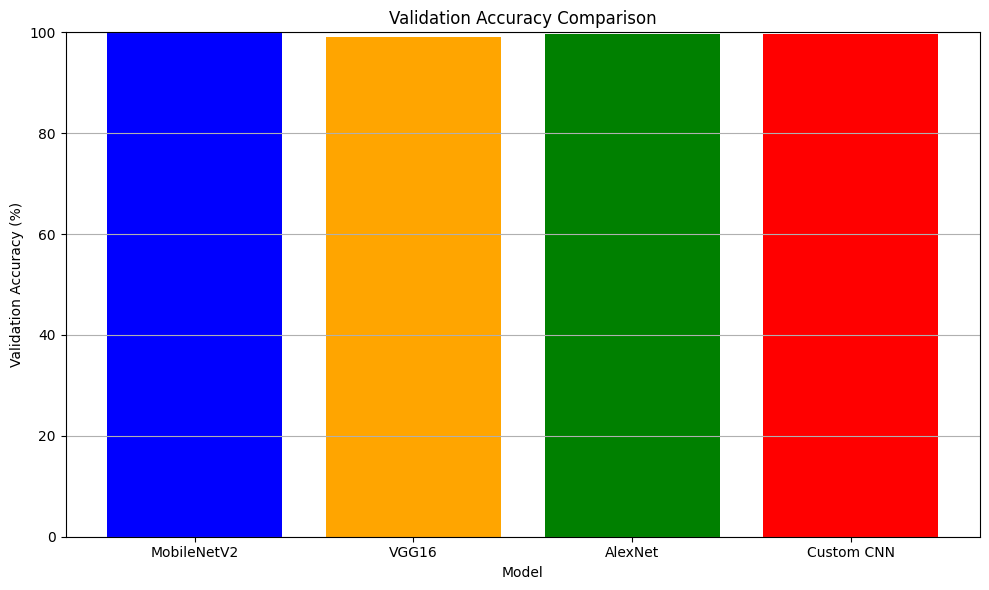

In [30]:
import matplotlib.pyplot as plt

# Define the model names and their corresponding validation accuracies
models = ['MobileNetV2', 'VGG16', 'AlexNet', 'Custom CNN']
accuracies = [99.87, 99.00, 99.62, 99.62]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.title('Validation Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.grid(axis='y')

# Display the bar graph
plt.tight_layout()
plt.show()
